<a href="https://colab.research.google.com/github/lucazappaterra/PhysLab-II---CYGNO/blob/main/trc_format_usage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parsing dei file in uscita dall'oscilloscopio con LecroyParser

Installiamo lecroyparser, va fatto ogni volta su Colab

In [3]:
!pip install lecroyparser

Importiamo le librerie

In [4]:
import lecroyparser
import matplotlib.pyplot as plt
import os

Scarichiamo i dati dalla repo su GitHub, e unzippiamoli (vanno caricati compressi per fare questa cosa). \\
Imho molto più comodo rispetto che a caricare la roba su colab ogni volta.

In [ ]:
!wget https://github.com/lucazappaterra/PhysLab-II---CYGNO/raw/main/pmt-xxx.zip
!unzip pmt-xxx.zip 

Giusto per vedere le cartelle nella directory facciamo un bel !ls

In [19]:
!ls

__MACOSX  pmt-xxx  pmt-xxx.zip	pmt-xxx.zip.1  pmt-xxx.zip.2  sample_data


Impostiamo il percorso (andrà cambiato di volta in volta) e creiamo una variabile ' files ' che ci servirà dopo per il loop

In [13]:
path='pmt-xxx/'
files = os.listdir(path)

E ora un bel loop sui file, stampando qualche info e plottando quello che c'è dentro. \\
**N.B.:** in questo caso c'è un file, .DS_Store , che non so se ci sarà in ogni caso, ma va skippato perché altrimenti LecroyParser non sa che farci e impazzisce.

0 C1--900V-15mV--00001.trc
Le Croy Scope Data
Path: None - from bytes data
Endianness: <
Instrument: LECROYWS4104HD
Instrument Number: 18165
Template Name: LECROY_2_3
Channel: Channel 1
WaveArrayCount: 502
Vertical Coupling: DC50
Bandwidth Limit: off
Record Type: single_sweep
Processing: No Processing
TimeBase: 20 ns/div
TriggerTime: 2022-03-18 00:09:44.95

1 C1--900V-15mV--00000.trc
Le Croy Scope Data
Path: None - from bytes data
Endianness: <
Instrument: LECROYWS4104HD
Instrument Number: 18165
Template Name: LECROY_2_3
Channel: Channel 1
WaveArrayCount: 502
Vertical Coupling: DC50
Bandwidth Limit: off
Record Type: single_sweep
Processing: No Processing
TimeBase: 20 ns/div
TriggerTime: 2022-03-18 00:09:22.36

2 .DS_Store


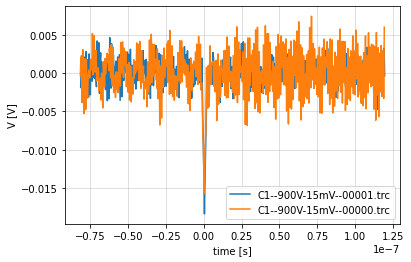

In [21]:
for i,filename in enumerate(files):
    print(i,filename)
    if(i==2): pass # .Ds_Store 
    else:
        f = open(path+filename, 'rb')
        data = lecroyparser.ScopeData(data = f.read())
        print(data)
        plt.plot(data.x, data.y, label=filename)
        plt.grid(alpha=.5)
        plt.xlabel('time [s]')
        plt.ylabel('V [V]')
        plt.legend()
        f.close()